In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [462]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 크롤링한 데이터 읽어오기

In [463]:
global new_hd
global used_hd
global new_kia
global used_kia
global new_gnss
global used_gnss
global new_sy
global used_sy
global new_benz
global used_benz
global new_bmw
global used_bmw
global new_audi
global used_audi




new_hd = pd.read_csv('현대_new_car_list.csv')
used_hd = pd.read_csv('현대_used_car_list.csv')
new_kia = pd.read_csv('기아_new_car_list.csv')
used_kia = pd.read_csv('기아_used_car_list.csv')
new_gnss = pd.read_csv('제네시스_new_car_list.csv')
used_gnss = pd.read_csv('제네시스_used_car_list.csv')
new_sy = pd.read_csv('쌍용_new_car_list.csv')
used_sy = pd.read_csv('쌍용_used_car_list.csv')
new_benz = pd.read_csv('벤츠_new_car_list.csv')
used_benz = pd.read_csv('벤츠_used_car_list.csv')
new_bmw = pd.read_csv('BMW_new_car_list.csv')
used_bmw = pd.read_csv('BMW_used_car_list.csv')
new_audi = pd.read_csv('아우디_new_car_list.csv')
used_audi = pd.read_csv('아우디_used_car_list.csv')

# 예산 범위 내에서 차량 추천

In [464]:
def recoCar(budget_start,budget_end):
    used_hd1 = used_hd.drop(index=used_hd[used_hd['Price'] == '홈서비스'].index.values.astype(int),axis=0)
    used_hd1.fillna(0)
    used_hd1['Price'] = used_hd1['Price'].astype(int)
    result1 = used_hd1[used_hd1['Price'].between(budget_start,budget_end)].sort_values(by='Price')
    
    used_kia1 = used_kia.drop(index=used_kia[used_kia['Price'] == '홈서비스'].index.values.astype(int),axis=0)
    used_kia1.fillna(0)
    used_kia1['Price'] = used_kia1['Price'].astype(int)
    result2 = used_kia1[used_kia1['Price'].between(budget_start,budget_end)].sort_values(by='Price')
    
    used_gnss1 = used_gnss.drop(index=used_gnss[used_gnss['Price'] == '홈서비스'].index.values.astype(int),axis=0)
    used_gnss1.fillna(0)
    used_gnss1['Price'] = used_gnss1['Price'].astype(int)
    result3 = used_gnss1[used_gnss1['Price'].between(budget_start,budget_end)].sort_values(by='Price')
    
    used_sy1 = used_sy.drop(index=used_sy[used_sy['Price'] == '홈서비스'].index.values.astype(int),axis=0)
    used_sy1.fillna(0)
    used_sy1['Price'] = used_sy1['Price'].astype(int)
    result4 = used_sy1[used_sy1['Price'].between(budget_start,budget_end)].sort_values(by='Price')
    
    used_benz1 = used_benz.drop(index=used_benz[used_benz['Price'] == '홈서비스'].index.values.astype(int),axis=0)
    result5 = used_benz1[used_benz1['Price'].between(budget_start,budget_end)].sort_values(by='Price')
    
    used_bmw1 = used_bmw.drop(index=used_bmw[used_bmw['Price'] == '홈서비스'].index.values.astype(int),axis=0)
    result6 = used_bmw1[used_bmw1['Price'].between(budget_start,budget_end)].sort_values(by='Price')
    
    used_audi1 = used_audi.drop(index=used_audi[used_audi['Price'] == '홈서비스'].index.values.astype(int),axis=0)
    used_audi1.fillna(0)
    used_audi1['Price'] = used_audi1['Price'].astype(int)
    result7 = used_audi1[used_audi1['Price'].between(budget_start,budget_end)].sort_values(by='Price')
    return result1,result2,result3,result4,result5,result6,result7

In [466]:
mf = {'현대' : 0,'기아' : 1,'제네시스' : 2,'쌍용' : 3,'벤츠' : 4,'BMW' : 5,'아우디' : 6}
recoCar(2000,3000)[mf['벤츠']]

,Release Year,Model Name,Price,Km,Fuel,Manf
3174,2008,S클래스,2000.0,230000.0,가솔린,벤츠
3123,2008,S클래스,2000.0,230000.0,가솔린,벤츠
4137,2015,GLK클래스,2000.0,139670.0,디젤,벤츠
3177,2008,S클래스,2000.0,230000.0,가솔린,벤츠
619,2008,E클래스,2000.0,156901.0,가솔린,벤츠
...,...,...,...,...,...,...
3056,2006,SL클래스,3000.0,102415.0,가솔린,벤츠
3043,2006,SL클래스,3000.0,102415.0,가솔린,벤츠
3037,2006,SL클래스,3000.0,102415.0,가솔린,벤츠
4043,2018,CLA클래스,3000.0,45776.0,가솔린,벤츠


# 신차대비 감가율 계산

In [211]:
def comparePrice(new_csv,used_csv,model):
    new = new_csv
    used = used_csv

    used = used.drop(index=used[used['Price'] == '홈서비스'].index.values.astype(int),axis=0)
    #used = used.drop(index=used[used['Price'].str.contains('렌트승계').values == True].index.values,axis=0)
    #used = used.drop(index=used[used['Price'].str.contains('리스승계').values == True].index.values,axis=0)
    used = used.fillna(0)
    used['Price'] = used['Price'].astype(int)
    
    
    new['Price avg'] = (new['Min Price(won)'] + new['Max Price(won)']) / 2
    
    new_pivot = pd.pivot_table(new,
                                index = 'Model Name',
                                columns = 'Release Year',
                                values = 'Price avg',
                                aggfunc = 'median')
    
    used_pivot = pd.pivot_table(used,
                                index = 'Model Name',
                                columns = 'Release Year',
                                values = 'Price',
                                aggfunc = 'median')

    used_model_name = used_pivot.filter(regex=model,axis=0)
    #used_model_name = used_model_name.drop([2093],axis=1)
    used_model_name = used_model_name.fillna(0)
    
    new_gran = new_pivot.loc[model,:]
    used_gran = used_model_name.max()
    
    used_gran = used_gran
    
    depr_rate = pd.concat([new_gran,used_gran],axis=1)
    depr_rate = depr_rate.rename(columns = {model : '신차',0 : '중고차'})
    
    depr_rate = depr_rate.dropna(axis=0)
    depr_rate['감가율(%)'] = 100-((depr_rate['중고차'] / depr_rate['신차']) * 100)
    
    depr_rate = depr_rate.drop(index=depr_rate[depr_rate['중고차']==0].index.values,axis=0)
    depr_rate['중고차'] = depr_rate['중고차'].round(1)
    depr_rate['감가율(%)'] = depr_rate['감가율(%)'].round(1)
    return depr_rate

In [471]:
model_name = 'E클래스'

In [477]:
test = comparePrice(new_benz,used_benz,model_name)
test

,신차,중고차,감가율(%)
Release Year,,,
2006,8090.0,450.0,94.4
2007,8290.0,530.0,93.6
2008,7970.0,680.0,91.5
2010,11185.0,950.0,91.5
2011,11032.5,1090.0,90.1
2012,13840.0,1080.0,92.2
2013,13850.0,1370.0,90.1
2014,10692.5,1920.0,82.0
2015,10617.5,2250.0,78.8


# 해당 모델의 중고차 매물 수

In [473]:
def countModel(used_csv,model_name):
    used = used_csv
    return len(used[used['Model Name'].str.contains(model_name)])

In [478]:
countModel(used_benz,model_name)

1459

# 해당 모델의 연식별 신차 가격, 중고차 가격, 감가율 그래프 그리기

In [479]:
def drawNewUsed(result,model_name):
    fig, ax1 = plt.subplots(figsize=(10,8))

    ax1.scatter(result.index,result['신차'])
    ax1.scatter(result.index,result['중고차'])
    ax1.plot(result.index,result['신차'],label='신차')
    ax1.plot(result.index,result['중고차'],label='중고차')
    
    ax1.legend(loc='upper left')
    ax1.set_xlabel('연식')
    ax1.set_ylabel('가격(단위 : 만 원)')
    plt.title("%s" % (model_name))
    
    ax2 = ax1.twinx()
    ax2.plot(result.index,result['감가율(%)'],label='감가율',c='r')
    ax2.legend(loc='upper right')
    ax2.set_ylabel('단위 : %')

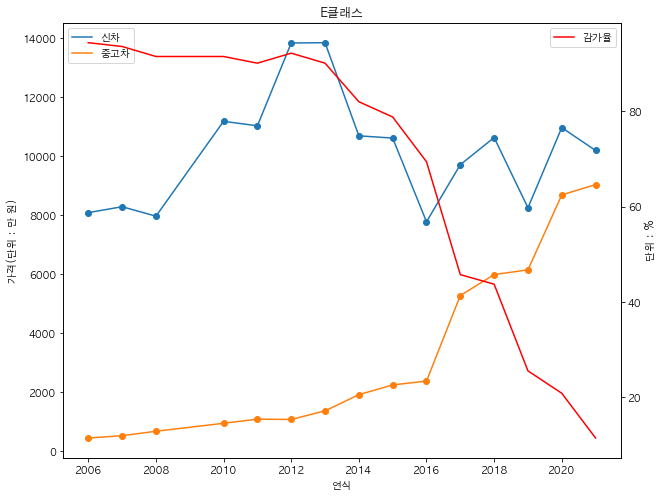

In [480]:
drawNewUsed(test,model_name)

# 주요 모델 별 감가율 비교

In [484]:
model1 = '에쿠스'
model2 = '아반떼'

In [485]:
ab1 = comparePrice(new_hd,used_hd,model1)
ab2 = comparePrice(new_hd,used_hd,model2)

Text(0.5, 1.0, '모델별 감가율')

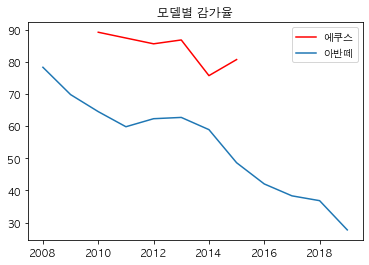

In [486]:
plt.plot(ab1.index,ab1['감가율(%)'],label=model1,c='r')
plt.plot(ab2.index,ab2['감가율(%)'],label=model2)
plt.legend()
plt.title('모델별 감가율')